In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Module 2: Portfolio optimization
____

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font",family="serif")
plt.rc("font",size=15)

from datetime import datetime, timedelta
import yfinance as yf

import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from numpy.random import multivariate_normal

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import random
random.seed(1000)

# Modern Portfolio Theory

* * *

In 1952, Harry Markowitz proposed a normative model for selection of risky assets. 
The basic assumption was that inversors care about the **return** and **risk** of their portfolios. 
His great contribution was to define **return** as the mean of the probability distribution of assets returns and **risk** as the variance of that distribution.
By defining risk as variance, Markowitz was able to quantify precisely the gains of diversification: through diversification, risk can be reduced (though not eliminated) without changing the expected portfolio return.


## Basic theory

### The expected return on a portfolio

The return of a risky asset *j* will be defined as

$$ R_{j,t+1,s} = \dfrac{P_{j,t+1,s} - P_{j,t}}{P_{j,t}}$$

Where $P$ denotes the price of the asset, $t$ is the date in which the asset is bought, $t+1$ is the date in which the asset is sold and $s$ denote the state of nature.

For simplicity, we will asume that the return's distribution is discrete and $\pi_s$ is the probability of each state of the nature. Thus, its expectation equals:

$$E(R_{j,t+1}) = \sum_{s = 1}^S \pi_s R_{j,t+1,s}$$

Consider a portfolio consisting of N assets, and let $\omega_j$ be the weight of each asset in the cost of the portfolio, then the return of this portfolio is:

$$R_{p,t+1,s}  = \sum_{j=1}^N \omega_j R_{j,t+1,s}$$

That is, the return on a portfolio is a weithed average of the returns of the assets in the portfolio.

The portfolio's expected return is also the weigthed average of the asset expected returns:

$$E(R_p) = \sum_{j=1}^N\omega_jE(R_j)$$


### Measurement of risk and diversification

The variance of an asset return equals:

$$\sigma_j^2 = E [R_j - E(R_j)]^2 = \sum_{s=1}^S \pi_s [R_j - E(R_j)]^2$$


In order to understand how can a portfolio reduce its risk through diversification, let's asume we only have two assets. The variance of this two-assets portfolio is:

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\sigma_{12}$$

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Note that the variance of the portfolio depends on the correlation between the assets. We will explore how different correlations have a different impact on the variance of the portfolio and therefore in diversification gains.


The entire model is described by mean and variance of the assets. 

Therefore we are necessarily assuming that no other statistics are necessary to describe the distribution of end-of-period wealth. 

Since normal distribution is determined by mean and variance, if returns are normal distributed then we can fully describe the investment opportunity set. We will need to verify this condition and in case it doesn't hold we will have to assume so.

We define the **invesment opportunity set** as the pairs of mean and standard deviation that can be achived by inversing arbitrary amounts in the *N* risky assets. The **frontier** of the invesment opportunity set is defined as the set of portfolios with minimum variance among all portfolios with equal expected returns.


### Sharpe ratio

In order to be capable to compare between different investment choices, we need a risk-adjusted return measure. Sharpe ratio is defined as the excess portfolio return over the risk-free rate relative to its standard deviation:

$$ S = \dfrac{E(R_p) - R_f}{\sigma_p}$$

where $R_f$ is the risk free rate of the market.

### Matrix notation

For computational purposes it is much more useful to have a matrix representation of the above measures of the porfolio.

The expected return of the porfolio is:

$$E(R_p) = \omega' E(R)$$

where $E(R)$ is the vector containing the expected returns of all the assets and $\omega$ is the vector of weights.


The variance of the portfolio is:

$$\sigma_p^2 = \omega' \Sigma \omega$$

where $\Sigma$ is the covariance matrix of the returns:

$$ \Sigma =  \begin{bmatrix} \sigma_1^2 & \sigma_{1,2} & \dots & \sigma_{1,N}\\
\sigma_{2,1} & \sigma_{2}^2 & \dots & \sigma_{2,N}\\
\vdots & \vdots & \ddots & \vdots\\
\sigma_{N,1} & \sigma_{N,2} & \dots & \sigma_{N}^2
\end{bmatrix}$$

### Different correlations

Supose we have 2 normaly distributed assets.  We want to explore how a different correlation between them can generate different results in terms of diversification gains.

Recall the variance of the portfolio is


$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Let's asume for simplicity that both assets have the same variance. Then,

$$ \sigma^2_p = \left[1 - 2\omega(1 - \omega)(1 - \rho_{12})\right]\sigma^2$$

This allows as to visualize the reduction of the portfolio variance compared to the variance of the assets, i.e. diversification gains.



#### Case 1: Uncorrelated returns ($\rho =0$)

The maximum reduction in variance is achived when the inversment is equally split across securities ($\omega = 1/2$), which gives:

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)]\sigma^2$$

$$\sigma^2_p = \left[1 - \dfrac{1}{2}\right]\sigma^2  = \dfrac{1}{2}\sigma^2$$

This means that by combining the two assets, variance can be reduced to half of individual variances. 

This makes sense if we think of what a zero correlation means. Think for instance of tossing a coin twice, where the outcome of each toss is independent of the other. 

If instead of betting everything on a single toss we split out money into two toss, some losses will be offset by gains on the other gamble, but we may still lose on boths. 

Risk is reduced but not eliminated.

We will set the same variances for both assets and equal to 1. This will imply that $\rho_{12} = \dfrac{cov_{12}}{var_1 var_2} = cov_{12}$. Let's also assume that the assets means are 1 and 2.

In [4]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def portf_mean(w, mean):
    mu = w.dot(mean)
    return mu
    
def portf_var(w, cov_matrix):
    
    sigma2 = np.diagonal(w.dot(cov_matrix).dot(w.T))
    return sigma2    

In [5]:
weights = np.zeros((500,2))

In [6]:
for i in range(len(weights)):
    weights[i] = rand_weights(2)

In [7]:
var1 = 1
var2 = 1
var= [var1, var2]
mean = [1,2]

print(f'Variance: {var}')
print(f'Mean: {mean}')

Variance: [1, 1]
Mean: [1, 2]


Let's first plot the points of mean and variance of each individual assets.

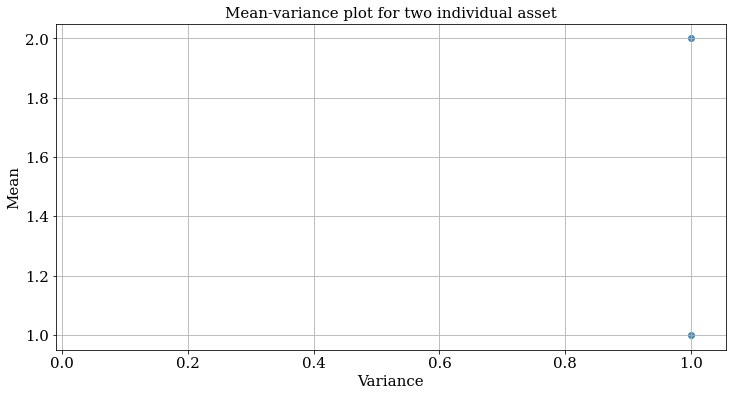

In [8]:
fig = plt.figure(figsize = (12,6))
plt.scatter(var, mean, marker='o',alpha = 0.8)

plt.xlabel('Variance')
plt.ylabel('Mean')
plt.xlim(-0.01)
plt.title('Mean-variance plot for two individual asset', fontsize = 15)
plt.grid(True)

In the above graph we are only considering two portfolios, each one formed only by one asset.

We now want to see the mean and variance of porfolios in which we combine the two assets, in order to understand the power of diversification.

In [9]:
def mean_var_plot(mean, var, corr):
    fig = plt.figure(figsize = (22,9))              
    plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')
    
    if corr == 1:
        for mu, sigma in zip(mean, var):
            if mu < max(mean):
                plt.scatter(sigma, mu, color = 'red')
        plt.scatter(x= var[np.argmax(mean)], y = max(mean), 
                    lw = 8, label = 'Minimum variance achieved',  marker= "X", c ='gold', s=50)

    else:
        for mu, sigma in zip(mean, var):
            if mu < mean[np.argmin(var)]:
                plt.scatter(sigma, mu, color = 'red')
        plt.scatter(x= min(var), y = mean[np.argmin(var)], marker= "X",
                   lw = 8, label = 'Minimum variance achieved', c ='gold', s=50)               
            
    plt.xlabel('Variance')
    plt.ylabel('Mean')
    plt.xlim(-0.01)
    plt.legend(loc='lower left', fontsize = 13)
    plt.title('Mean-variance frontiers for two asset with correlation '+ str(corr), fontsize = 15)
    plt.grid(True)
    
    return

In [10]:
#Case 1
cov1 = 0
cov_matrix1 = np.asarray([[var1, cov1],
              [cov1, var2]])
case1 = multivariate_normal(mean, cov_matrix1, size = 100)
mean_p1= portf_mean(weights, mean)
var_p1 = portf_var(weights, cov_matrix1)

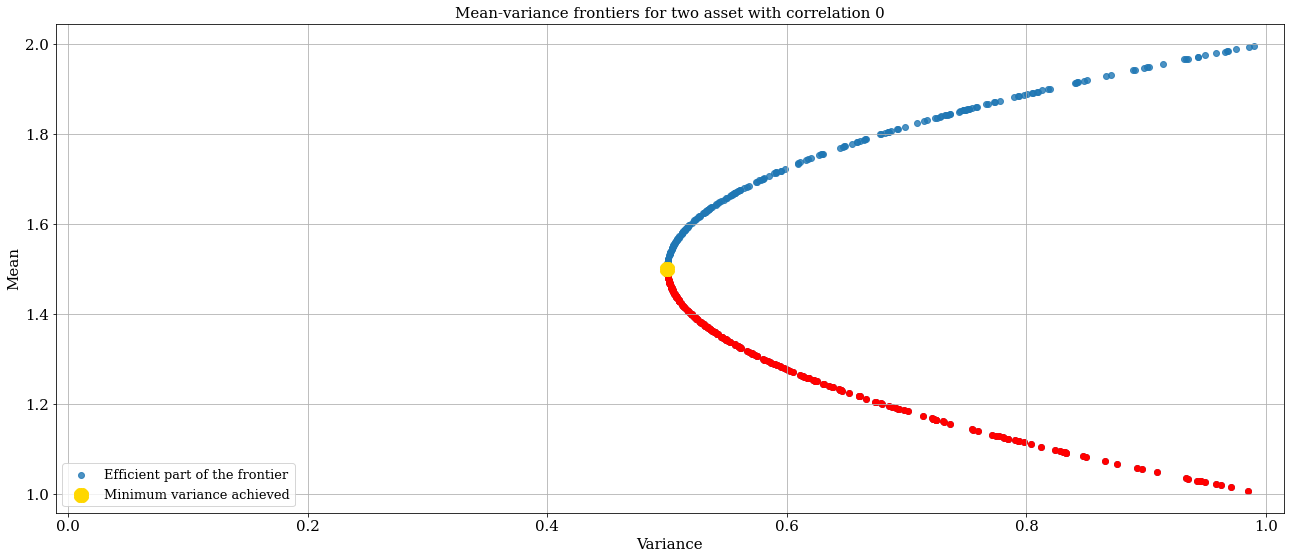

In [11]:
mean_var_plot(mean_p1, var_p1, corr = 0)

#### Case 2: Imperfectly positively correlated returns ($\rho =0.5$)

$$ \sigma^2_p = [1 - \omega(1 - \omega)]\sigma^2$$

Again, the maximum reduction in variance is achieved when the investment is equally split aross assets, but now:

$$ \sigma^2_p = \left[1 - \dfrac{1}{4}\right]\sigma^2 = \dfrac{3}{4}\sigma^2$$

Only a quarter of individual variance can be reduced. Losses are offset by gains but assets returns tend to move in the same direction, so such compensations across assets are less frequent.


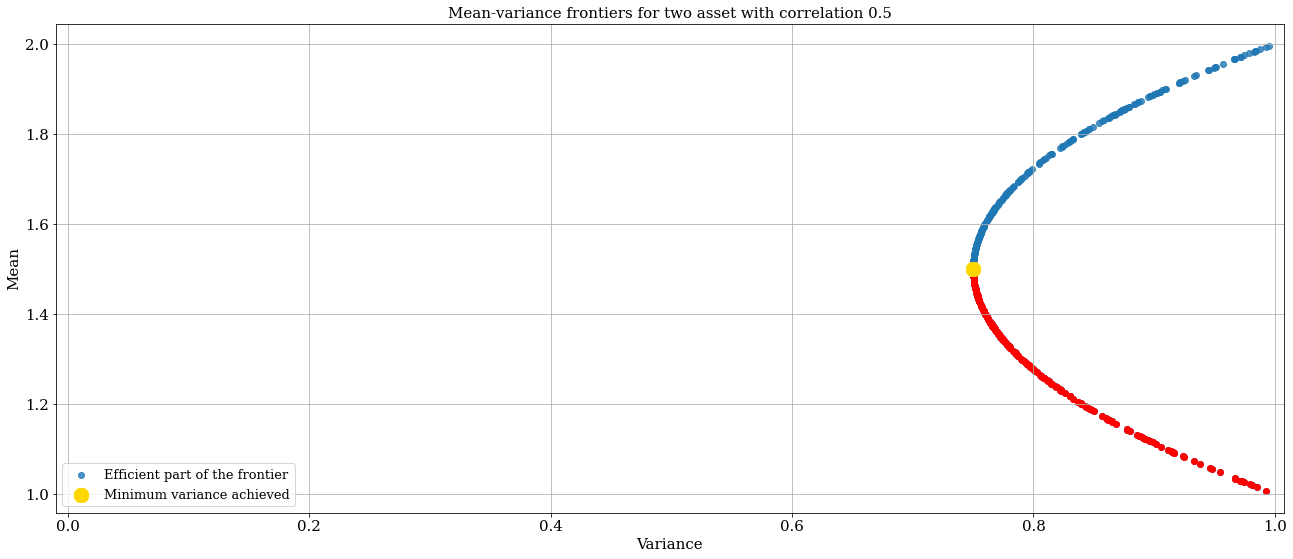

In [12]:
#Case 2
cov2 = 0.5
cov_matrix2 = [[var1, cov2],
              [cov2, var2]]
case2 = multivariate_normal(mean, cov_matrix2, size = 100)
mean_p2= portf_mean(weights, mean)
var_p2 = portf_var(weights,cov_matrix2)

mean_var_plot(mean_p2, var_p2, corr = 0.5)

#### Case 3: Perfectly positively correlated returns ($\rho = 1$)

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)(1-1)]\sigma^2 = \sigma^2$$

Since assets always move in the same direction, there is no diversification gains.


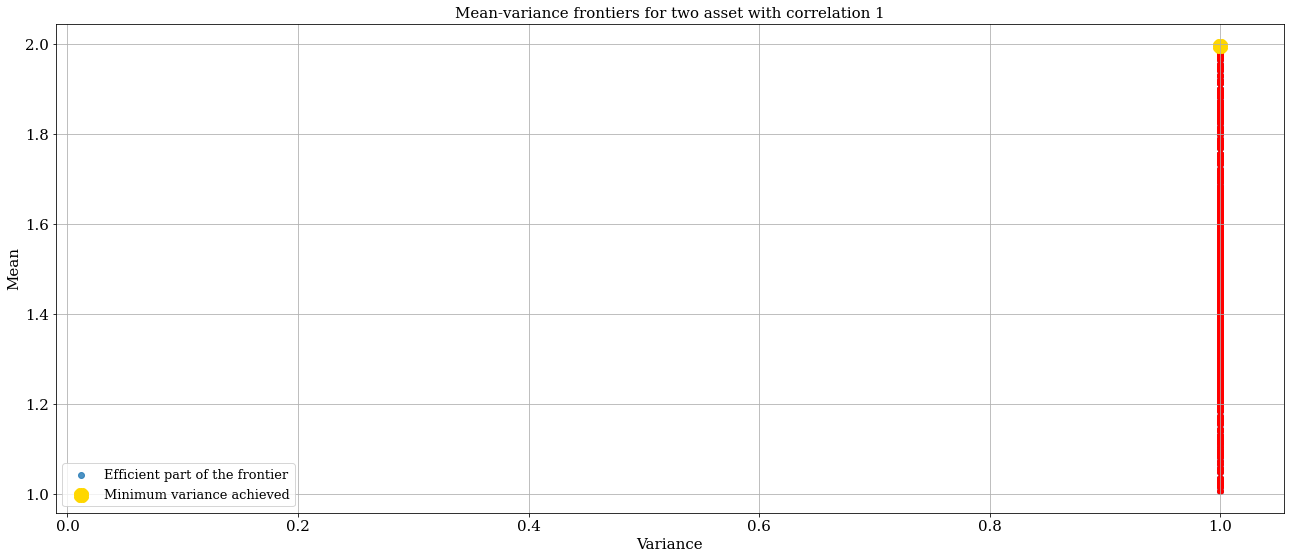

In [13]:
#Case 3
cov3 = 1
cov_matrix3 = [[var1, cov3],
              [cov3, var2]]
case3 = multivariate_normal(mean, cov_matrix3, size = 100)
mean_p3= portf_mean(weights, mean)
var_p3 = portf_var(weights, cov_matrix3)

mean_var_plot(mean_p3, var_p3, corr = 1)

#### Case 4: Imperfectly negatively correlated returns  ($\rho = -0.5$)

$$ \sigma^2_p = [1 - 3\omega(1 - \omega)]\sigma^2 $$

With $\omega = 1/2$:

$$ \sigma^2_p = \left[1 - \dfrac{3}{4}\right]\sigma^2 = \dfrac{1}{4}\sigma^2$$

Losses on one asset are offset by gains on the other. This happens more frequently than in the no correlation case, as asset returns tend to move in opposite directions.


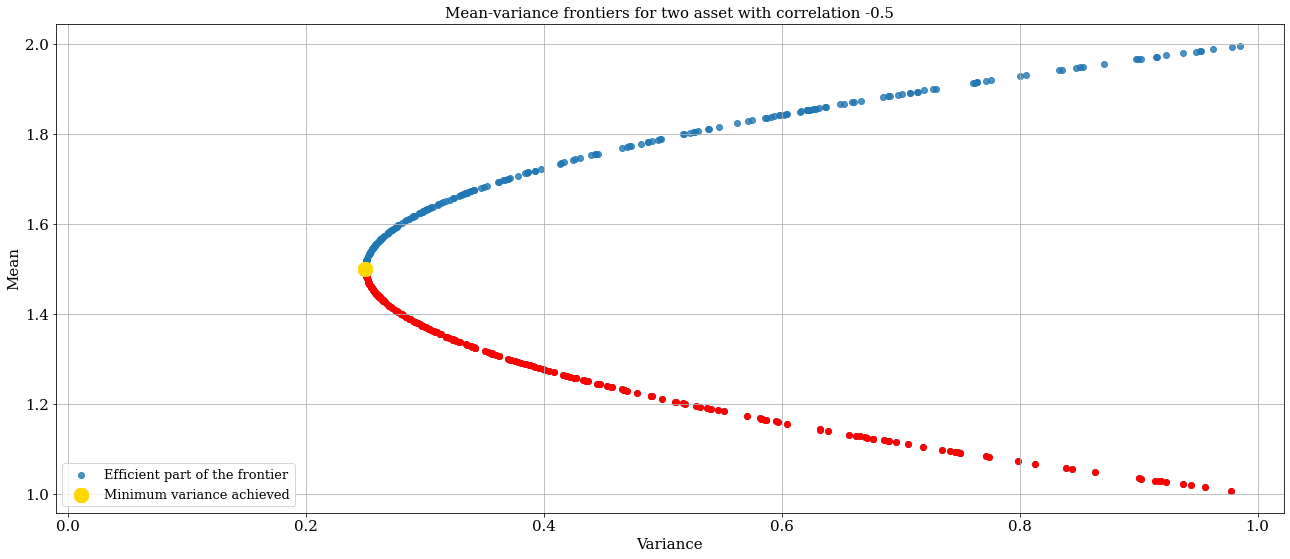

In [14]:
#Case 4
cov4 = -0.5
cov_matrix4 = [[var1, cov4],
              [cov4, var2]]
case4 = multivariate_normal(mean, cov_matrix4, size = 100)
mean_p4= portf_mean(weights, mean)
var_p4 = portf_var(weights, cov_matrix4)

mean_var_plot(mean_p4, var_p4, corr = -0.5)

#### Case 5: Perfectly negatively correlated returns ($\rho = -1$)

$$ \sigma^2_p = [1 - 4\omega(1 - \omega)(1-1)]\sigma^2$$

Setting $\omega = 1/2$ we get:

$$ \sigma^2_p = \left[1 - \dfrac{4}{4}\right]\sigma^2 = 0 $$

In this case losses are always compensated with gains so we can completely eliminate variance. Instead of risk diversification, we are actually talking about *risk hedging*. 

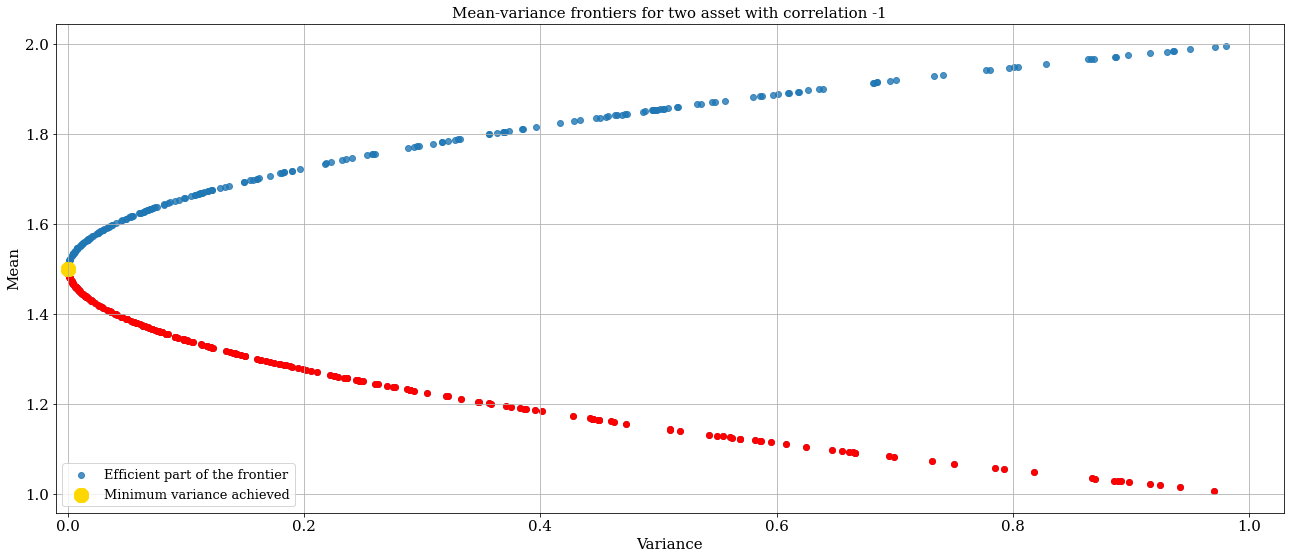

In [15]:
#Case 5
cov5 = -1
cov_matrix5 = [[var1, cov5],
              [cov5, var2]]
case5 = multivariate_normal(mean, cov_matrix5, size = 100)
mean_p5= portf_mean(weights, mean)
var_p5 = portf_var(weights, cov_matrix5)

mean_var_plot(mean_p5, var_p5, corr = -1)

Text(0.5, 1.0, 'Mean-variance frontiers for different correlations')

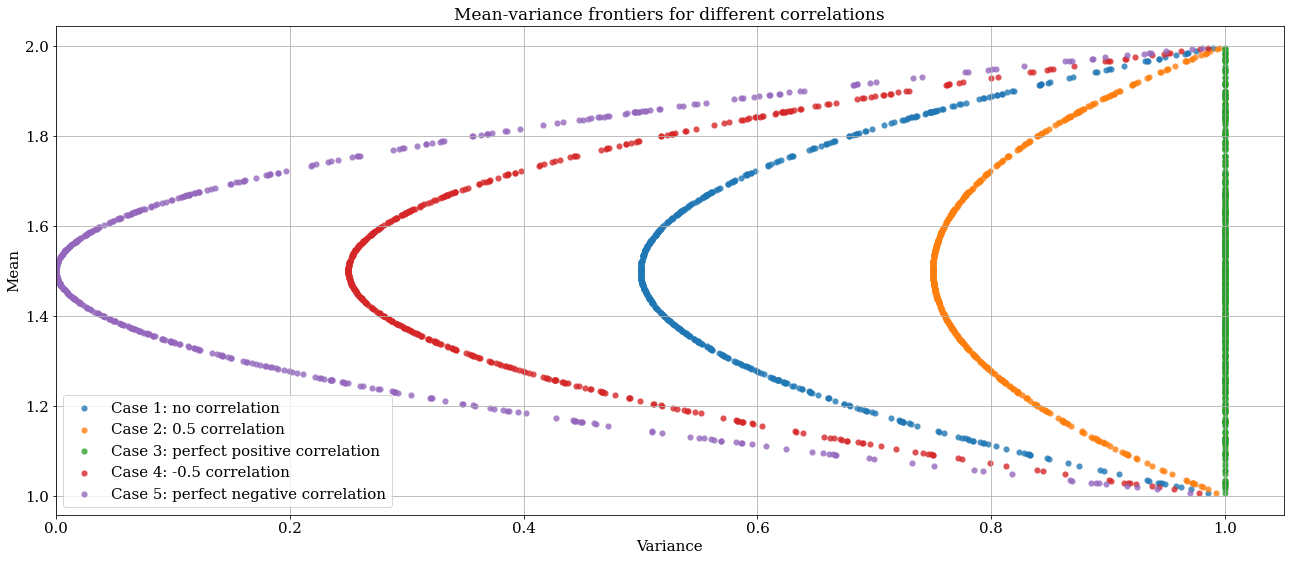

In [16]:
fig = plt.figure(figsize = (22,9))              
plt.scatter(var_p1, mean_p1, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 1: no correlation')
plt.scatter(var_p2, mean_p2, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 2: 0.5 correlation') 
plt.scatter(var_p3, mean_p3, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 3: perfect positive correlation') 
plt.scatter(var_p4, mean_p4, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 4: -0.5 correlation') 
plt.scatter(var_p5, mean_p5, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 5: perfect negative correlation') 

plt.xlabel('Variance', fontsize = 15)
plt.ylabel('Mean', fontsize = 15)
plt.xlim(0)
plt.legend(loc='lower left', fontsize = 15)
plt.grid(True)
plt.title('Mean-variance frontiers for different correlations', fontsize = 17)

In [17]:
def returns_plot(cov):
    cov_matrix = np.asarray([[1, cov],
              [cov, 1]])
    mean = [0,0]
    case = multivariate_normal(mean, cov_matrix, size = 1000)
    
    fig = plt.figure(figsize = (22,9))
    
    plt.scatter(x=case[:,0], y=case[:,1])
    plt.xlabel('Asset 1 returns', fontsize = 12)
    plt.ylabel('Asset 2 returns', fontsize = 12)
    plt.title('Scatter plot of assets returns with correlation '+ str(cov), fontsize = 15)
    plt.xlim(-4,4)
    plt.grid(True)
    
    return 

Correlation: .5


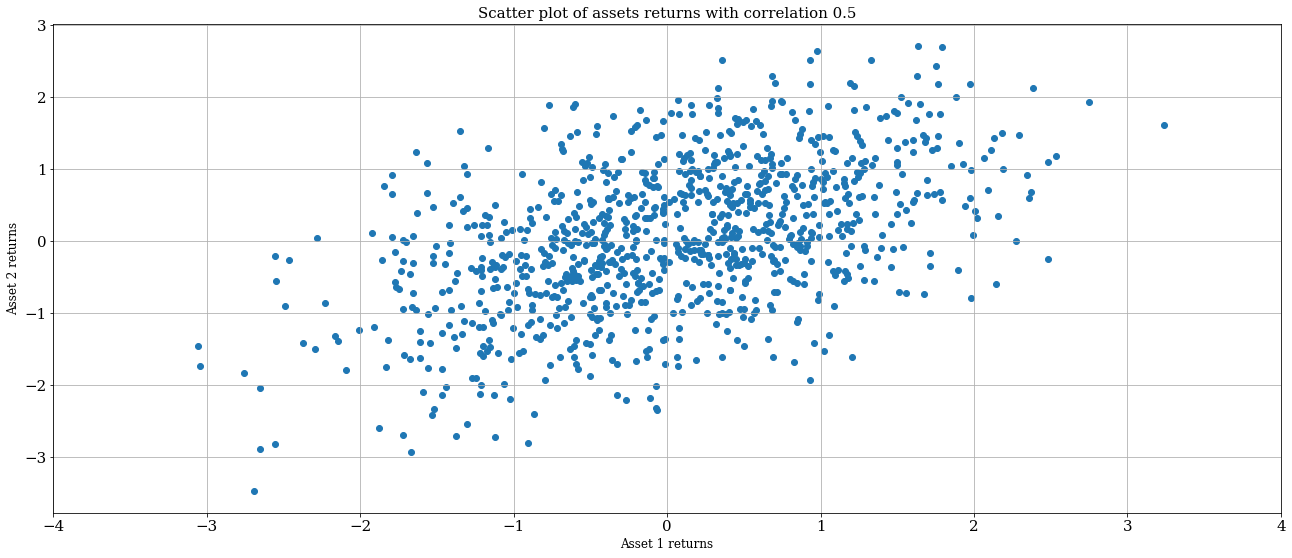

In [18]:
cor = float(input("Correlation: "))
if cor> 1 or cor< -1:
    print('Error! Correlation must be between -1 and 1')
else:
    returns_plot(cor)

Let's now add a third asset.

In [19]:
weights = np.zeros((2000,3))
for i in range(len(weights)):
    weights[i] = rand_weights(3)

In [20]:
noa = 3
n_obs = 10000

return_vec = np.random.randn(noa, n_obs)

In [21]:
pmean = portf_mean(weights, np.mean(return_vec, axis = 1))
pvar = portf_var(weights, np.cov(return_vec))

''

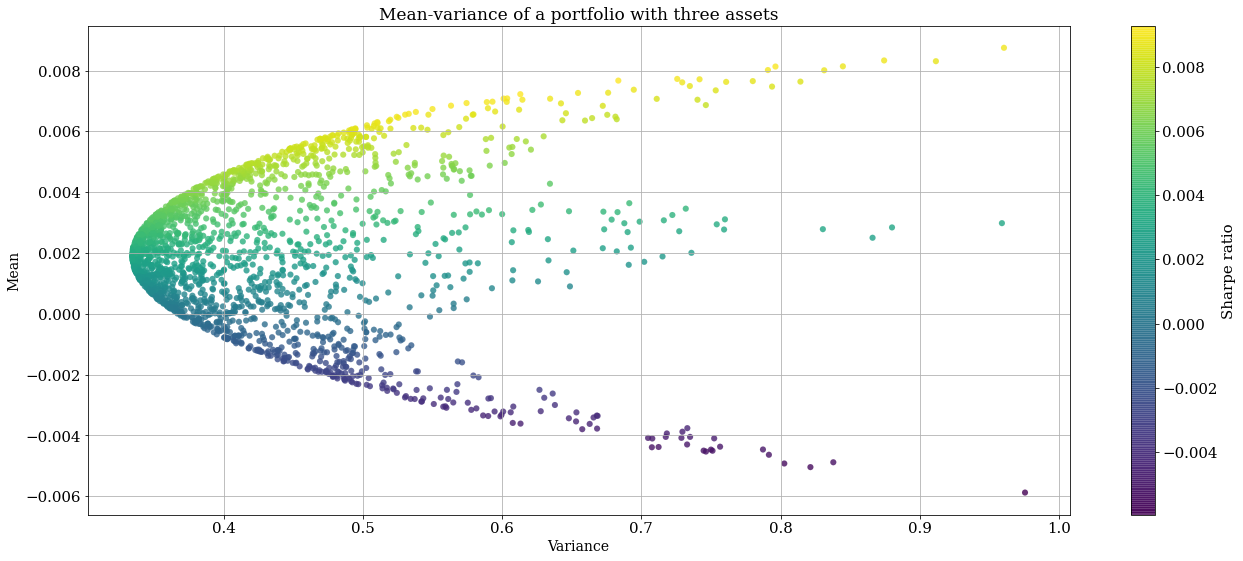

In [22]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.grid(True)
plt.title('Mean-variance of a portfolio with three assets', fontsize = 17)
plt.xlabel('Variance', fontsize = 14)
plt.ylabel('Mean', fontsize = 14)
plt.colorbar(label = 'Sharpe ratio')
;

The graph above shows that when we invest in the three assets simultaneously, not only do we have access to more combinations of mean and variance, but also to better combinations. By adding a third asset to the portfolio, we profit from further diversification gains.

When calculating the Shapre ratio we assume $R_f = 0$

## Efficient frontier

It is clear that not all weight distriburions perfom well when measured in terms of mean and variance. For example, for a fixed level of expected returns, say 0.04,  there are multiples portfolios that show different levels of risk. A rational investor would only be interested in the minimum risk given a fixed expected return, or the maximum return given a fixed risk level. This set of portfolios then makes up the so-called **efficient frontier**, which we will find now.

We will explain in detail the steps for finding the efficient frontier later.

In [25]:
bnds = tuple((0, 1) for x in range(noa))

def min_func_port(w):
    return statistics(w)[1]

def statistics(weights):
    
    weights = np.array(weights) 
    pret = np.sum(np.mean(return_vec, axis = 1) * weights)
    pvol = np.dot(weights, np.dot(np.cov(return_vec), weights.T))
    
    return np.array([pret, pvol, pret / pvol])


trets = np.linspace(pmean.min(), pmean.max(), 100)
tvols = []

ef_we = []

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, 
                {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, [noa * [1. / noa,]], method='SLSQP',  
                           bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)

ind = np.argmin(tvols)
tvols = tvols[ind:]
trets = trets[ind:]

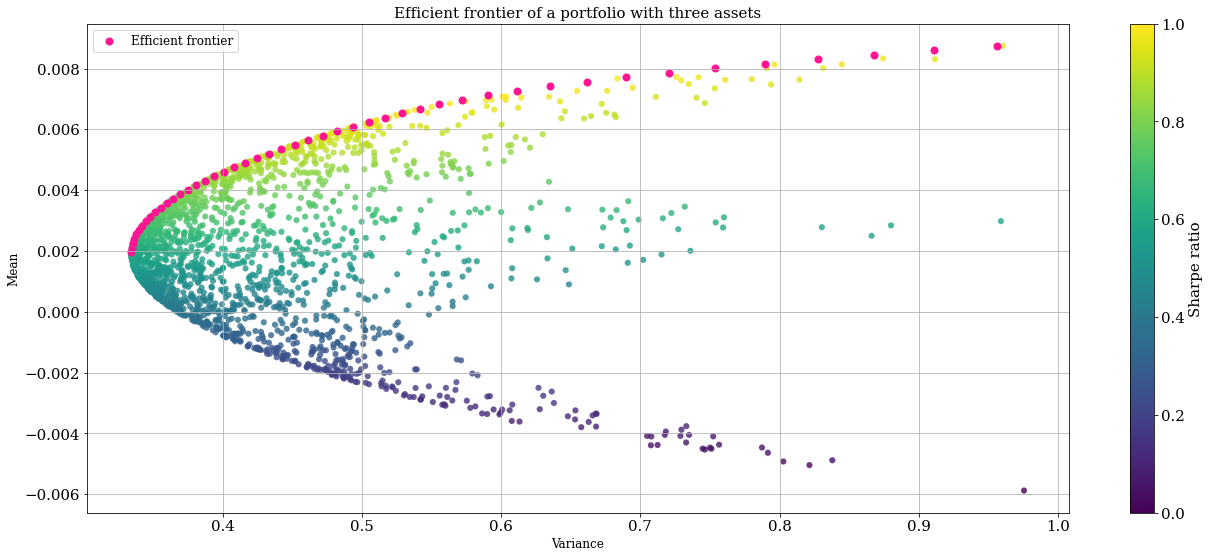

In [26]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.scatter(tvols, trets, c = 'deeppink', marker='o', label='Efficient frontier', lw = 2)
x = np.linspace(0.0, 5)

plt.grid(True)
plt.title('Efficient frontier of a portfolio with three assets', fontsize = 15)
plt.xlabel('Variance', fontsize = 12)
plt.ylabel('Mean', fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')
plt.legend(loc='best', fontsize = 12)

## Real data

Let's apply the theory to some real assets.

https://pypi.org/project/yfinance/

#### 11 sectors under the Global Industry Classification Standard:
  -  Energy
  -  Materials
  -  Industrials
  -  Utilities
  -  Healthcare
  -  Financials
  -  Consumer Discretionary
  -  Consumer Staples
  -  Information Technology
  -  Communication Services
  -  Real Estate
  
  
We will choose funds that replicate each sector in order to get a well diversified investment oportunity set.

In [ ]:
tickers_funds =['IYE','IYM','IYJ','IDU','IYH','IXG','RXI','KXI','XLK','VOX','IYR', 'IAU', 'LQD','HYG']

data = pd.DataFrame(columns=tickers_funds)

for ticker in tickers_funds:
    data[ticker] = yf.download(ticker, period='10y')['Adj Close'] #https://pypi.org/project/yfinance/
    
tickers_labels = ['Energy', 'Materials', 'Industrials', 'Utilities', 
               'Healthcare', 'Financials', 'Consumer Discretionary', 
               'Consumer Staples', 'Information Technology', 
               'Communication Services', 'Real Estate', 'Gold', 
                  'IG Corp',  'HY Corp']

data.columns = tickers_labels

In [ ]:
data.head()

Since time series start at rather different absolute value, we can show them in direct comparision by normalizing them to a starting value of 100:

In [ ]:
fig = px.line(data/ data.iloc[0] * 100)
fig.update_layout( title= "Last 10 years assets performance",
            xaxis_title="Date",
            yaxis_title="Value",
            font=dict(
                family="Arial, monospace",
                size=12,
                color="black"
            ))
fig.show()

In [ ]:
Ret_data = data.pct_change().round(4).dropna()
Ret_data

In [ ]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))
    
    
def normality_test(array):
    
    print("Skew of data set %14.3f" % scs.skew(array))
    print("Skew test p-value %14.3f" % scs.skewtest(array)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(array))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(array)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(array)[1])

In [ ]:
for ticker in tickers_labels:
    print("\nResults for symbol: %s" % ticker)
    print(30 * "-")
    returns = np.array(Ret_data[ticker])
    print_statistics(returns)

 The kurtosis values seem to be especially far from normal for all four data sets. We can also perform some normality tests.

In [ ]:
for ticker in tickers_labels:
    print("\nResults for symbol %s" % ticker)
    print(30 * "-")
    returns = np.array(Ret_data[ticker])
    normality_test(returns)

 The above tests have normality as null hypothesis. Thus, normality is rejected for all of our data sets.

We can also study normality by generating normal random variables with mean and standard deviation equal to those of our sample data and comparing the theoretical distribution with the observed one.

Let's perform that excercise for the Communication Services serie, which has a mean of 0.00042 and a standard deviation of 0.01137.

In [ ]:
mu, sigma = 0.00042, 0.01137

CS_normal = np.random.normal(mu, sigma, 2490)

In [ ]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 2, 1)

sm.qqplot(CS_normal, line = 's', ax = ax)
plt.title('QQ-plot of simulated CS')
plt.grid(True)

ax = fig.add_subplot(1, 2, 2)
sm.qqplot(Ret_data['Communication Services'], line = 's', ax = ax)
plt.title('QQ-plot of observed CS')
plt.grid(True)

In [ ]:
fig = plt.figure(figsize = (15,6))
plt.hist(Ret_data['Communication Services'], bins = 50,  label = 'Observed CS', alpha = 0.6)
plt.grid(True)
plt.hist(CS_normal, bins = 50, label = 'Simulated CS', alpha = 0.8)
plt.grid(True)
plt.legend(loc = 'center right')
plt.title('Histograms of simulated normal data and observed data')

Even though normality does not hold, we will asume so in the rest of the analysis. Let's now generate the data we need.

In [ ]:
#noa = number of assets

noa = len(tickers_labels)
rets = data.pct_change().round(4).dropna()
rets_mean = rets.mean() * 252
sigma = rets.cov() * 252

weights = rand_weights(noa)

In [ ]:
weights = np.zeros((2000,noa))
for i in range(len(weights)):
    weights[i] = rand_weights(noa)
    
pret= portf_mean(weights, rets_mean)
pvol = np.sqrt(portf_var(weights, sigma))

In [ ]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol)
plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')

## Portfolio Optimizations

To make our lives a bit easier, first we have a convenience function giving back the major portfolio statistics for an input weights vector/array.

The derivation of the optimal portfolios is a constrained optimization problem for which  we  use  the  function  minimize  from  the  **scipy.optimize**  sublibrary.

In [ ]:
def statistics(weights):
    '''
    Takes a list of weights
    Returns the mean return (pret), the standard deviation (pvol) and the Sharpe Ratio (pret/pvol)    
    '''
    
    weights = np.array(weights) 
    pret = np.sum(rets_mean * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))
    
    return np.array([pret, pvol, pret / pvol])

The minimization function minimize is quite general and allows for (in)equality constraints and bounds for the parameters. 

### Maximum Sharpe Ratio (MSR)

One portfolio of interest is the Max Sharpe ratio porfolio. In order to find it, we formally minimize the negative value of the Sharpe ratio:

In [ ]:
def min_func_sharpe(weights):    
    '''
    Takes a list of weights
    Returns the negative of the Sharpe Ratio
    '''
    return -statistics(weights)[2]

The constraint is that all parameters (weights) add up to 1. This can be formulated as follows using the conventions of the  minimize function

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

We also bound the parameter values (weights) to be within 0 and 1. These values are provided to the minimization function as a tuple of tuples in this case:

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

The only input that is missing for a call of the optimization function is a starting parameter list (initial guesses for the weights). We simply use an equal distribution.

Calling the function returns not only optimal parameter values, but much more. We store the results in an object we call opts.

In [ ]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa], method='SLSQP',bounds=bnds, constraints=cons) 

print(opts)

Our main interest lies in getting the optimal portfolio composition. 

To this end, we access the results object by providing the key of interest—i.e., x in our case. 

In [ ]:
print(tickers_labels)
opts['x'].round(3)

In [ ]:
opt_weights = pd.DataFrame(columns = ['MSR'], index= tickers_labels)
opt_weights['MSR'] = opts['x'].round(3)
opt_weights

Using the portfolio weights from the optimization, the following statistics emerge:

In [ ]:
statistics(noa * [1. / noa]).round(3)

In [ ]:
statistics(opts['x']).round(3)

In [ ]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')


plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

### Global Minimum Variance (GMV)

The portfolio with the minimum variance is called the Global Minimum Variance (GMV). Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

In [ ]:
def min_func_variance(weights):   
    '''
    Returns the variance
    
    '''
    return statistics(weights)[1]**2

In [ ]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,],method='SLSQP', bounds=bnds,constraints=cons)
print(tickers_labels)
optv['x'].round(3)

In [ ]:
opt_weights['GMV'] = optv['x'].round(3)
opt_weights

We can further add another possible portfolios: **the Naive Portfolio**. This portfolio, also known as the **Equally Weighed Portfolio**, is a simple portfolio that puts the same weights on all assets.

In [ ]:
np.array(noa * [1. / noa])

In [ ]:
print(tickers_labels)
naive = np.array(noa * [1. / noa])

print(np.sum(naive).round())

ms_prets = np.sum(rets.mean() * naive) * 252


ms_vols = np.sqrt(np.dot(naive.T, np.dot(rets.cov() * 252, naive)))

In [ ]:
opt_weights['Naive'] = naive

opt_weights

In [ ]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Naive portfolio', edgecolors='black')

plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

## Efficient frontier

The derivation of all optimal portfolios—i.e., all portfolios with minimum volatility for a given **target return level** (or all portfolios with maximum return for a given risk level) —is similar to the previous optimizations. The only difference is that we have to iterate over multiple starting conditions. 

The approach we take is that we fix a target return level and derive for each such level those portfolio weights that lead to the minimum volatility value. 

For the optimization, this leads to two conditions: 
+ one for the target return level  *tret*,
+ and one for the sum of the portfolio weights as before.

The boundary values for each parameter stay the same.

For clarity, we define a dedicated function min_func for use in the minimization procedure. It merely returns the volatility value from the  statistics function.

In [ ]:
con1 = {'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}
con2 = {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}
bnds = tuple((0, 1) for x in range(noa))

def min_func_port(w):
    '''
    Returns the standard deviation
    '''  
    return statistics(w)[1]

In [ ]:
'''
In the mean-variance diagram, trets represents the vertical axis.
For each value of expected return, we want to find the minimum volatility.
'''

trets = np.linspace(0.01, 0.18, 100)
tvols = []

ef_we = []

'''
We will carry this optimization several times (in a loop). For each value of trets, we look for the min variance.
tvols saves the min volatility for each tret.
ef_we saves the optimal weights for each (tret, tvol) pair
'''

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',  bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)
'''
Since we are only interested in the efficient part
'''
ind = np.argmin(tvols)
tvols = tvols[ind:]
trets = trets[ind:]

In [ ]:
ef_w = pd.DataFrame(ef_we,columns=tickers_labels)
ef_w.tail()

In [ ]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# efficient frontier
plt.scatter(tvols, trets, c = 'deeppink', marker='x', label='Efficient frontier', edgecolors='black')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Naive portfolio', edgecolors='black')

plt.grid(True)
plt.title('Minimum risk portfolios for given return level', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

Note that the point cloud does not aproach much to the efficient frontier. 

That's because the optimal weights that generate the frontier are extreme weights, i.e. combination of only few assets. 

This is hardly randomly generated. Thus, we are goinig to create those extreme weights in order to expand the cloud pf pairs values.

#### Extreme Weights:

#### 1. Weights on only a few assets: multiplying the generated weights by a vector of 0 and 1 (and normalizing)

#### 2. Weight on only one asset: identity matrix

#### 3. Optimal weights

In [ ]:
rand_weights(noa)*np.random.randint(2, size=(noa))

In [ ]:
def extreme_weights(noa):
    
    '''
    Returns an array of weights in which only a few assets have w>0.
    random.randint(0,2) returns a array of o and 1.
    '''
    
    ew = rand_weights(noa)*np.random.randint(2, size=(noa))
    np.seterr(divide='ignore', invalid='ignore')
    
    return ew / sum(ew)

In [ ]:
ex_weights = np.zeros((10000,noa))

for i in range(len(ex_weights)):
    ex_weights[i] = extreme_weights(noa)

In [ ]:
new_weights = np.concatenate((weights, ex_weights, np.identity(noa), ef_we))

In [ ]:
pret= portf_mean(new_weights, rets_mean)
pvol = np.sqrt(portf_var(new_weights, sigma))

In [ ]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# efficient frontier
plt.scatter(tvols, trets, c = 'deeppink', marker='x', label='Efficient frontier', edgecolors='black')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Naive portfolio', edgecolors='black')

plt.grid(True)
plt.title('Minimum risk portfolios for given return level', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'lower right')

## Capital Allocation Line

In addition to risky securities like stocks or commodities, there is in general one universal riskless investment opportunity available: *cash or cash accounts*.

In an idealized world, money held in a cash account with a large bank can be considered riskless (e.g., through public deposit insurance schemes). 

The downside is that such a riskless investment generally yields only a small return, sometimes close to zero.

However, taking into account such a riskless asset enhances the efficient investment opportunity set for investors considerably. 

The basic idea is that investors first determine an efficient portfolio of risky assets and then add the riskless asset to the mix. 

By adjusting the proportion of the investor’s wealth to be invested in the riskless asset it is possible to achieve any risk-return profile that lies on the straight line (in the risk-return space) between the riskless asset and the efficient portfolio.

Let's now assume that the investors porfolio is formed with a proportion $p$ of risky assets which yields a return $R_x$ and $(1-p)$ of the riskless asset whose return $R_f$ is not a random variable. The new porfolio characteristics will then be:

$$ R_p = pR_x + (1 - p)R_f $$

$$ E(R_p) = p E(R_x) + (1-p)R_f = R_f + (E(R_x) - R_f)p$$

$$ \sigma^2_p = p^2\sigma^2_x$$

Thus **the allocation line** will be:

$$ E(R_p) = R_f +\dfrac{(E(R_x) -R_f)}{\sigma_x}\sigma_p$$
$$ E(R_p) = R_f +S_x \sigma_p$$

The investor may combine the risk-free asset with any portfolio of risky asset available, which gives rise to many straight lines in the mean-variance diagram. 

But among all the efficient portfolios, all investor will choose one that achieves the best mean-variance pair, that is the **tangency porfolio**. 

That portfolio is the one that maximizes the Sharpe Ratio.

In order to find the capital allocation line we need to carry a spline interpolation of the efficient frontier. The following code selects exactly these portfolios from our previously used sets tvols and trets.

In [ ]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [ ]:
#Let's assume a risk free rate of 1%
Rf = 0.01

# We find the Sharpe ratio for each (vol, ret) pair
Sp = []
for sigma, mu in zip(evols, erets):
     Sp.append((mu - Rf)/sigma)

In [ ]:
# The CML is the line that starts at the risk free rate and its tangent to the efficient frontier.
# The slope of that line is the max Sharpe Ratio

sigma_T = np.linspace(0.0, 0.15)
E_T = Rf + max(Sp)*sigma_T

TP = np.argmax((erets-Rf)/evols) # Index of the tangency portfolio

In [ ]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = (pret-Rf)/pvol, edgecolors='w')

# efficient frontier
plt.plot(evols, erets, 'deeppink', lw=4, label='Efficient frontier')

# capital allocation line
plt.plot(sigma_T, E_T, lw = 3, label= 'Capital Allocation Line')

# tangency portfolio
plt.plot(evols[TP], erets[TP], 'y*', markersize=25.0, label='Tangency portfolio')

# risk free rate
plt.text(-0.01, Rf, 'Rf', fontsize = 15)

plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected return', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=14)
plt.title('Capital allocation line and tangency portfolio', fontsize = 15)

The portfolio weights of the tangent portfolio are as follows. 

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - erets[TP]}, 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',bounds=bnds, constraints=cons)

In [ ]:
keys = tickers_labels
values = res['x'].round(4)
res = {keys[i]: values[i] for i in range(len(keys))} 
res

# Lack of Robustness of the Markowitz procedure

Although the promise of the Markowitz procedure is exciting, in tends to fall apart in practice. The problem is that we rarely know Expected Returns and Expected Covariance in advance. Our estimates almost certainly contain some estimation error, and  the procedure is highly sensitive to these errors, which tend to get exaggerated in the portfolio.